Found 566 files belonging to 2 classes.

Eğitilmiş model 'best_tl_model.keras' diskten yükleniyor...


Model: "TL_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,713,416 (25.61 MB)

 Trainable params: 2,226,434 (8.49 MB)

 Non-trainable params: 34,112 (133.25 KB)

 Optimizer params: 4,452,870 (16.99 MB)

18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 445ms/step - accuracy: 0.9814 - loss: 0.0582

Test Seti Doğruluğu: 0.9841
Test Seti Kaybı: 0.0460
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 494ms/step


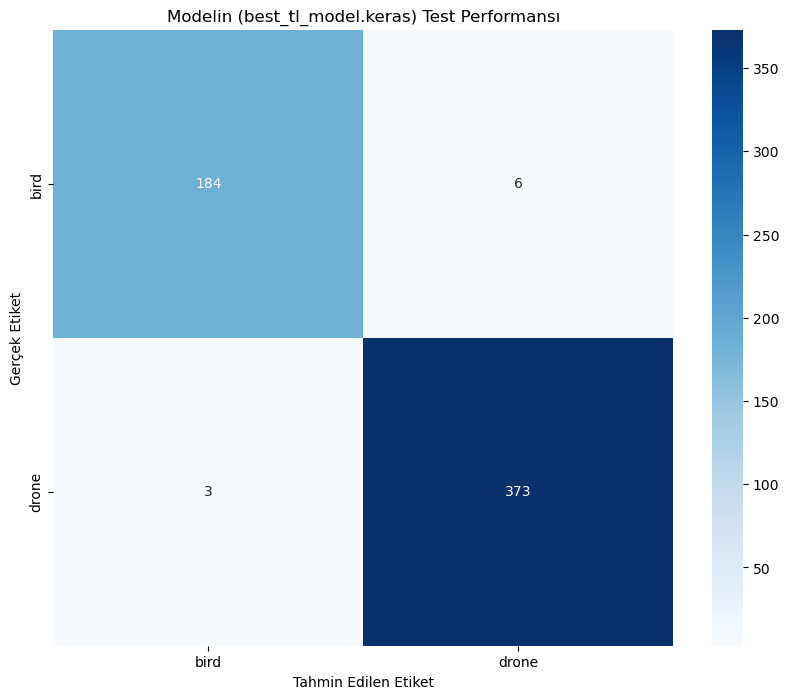

In [ ]:
# Gerekli kütüphaneleri dahil etme
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os

BASE_PATH = "C:/Users/mkasl/Desktop/donem5/yap470/Ara_rapor_ 1/final_dataset1" #2 sınıflı verinin olduğu dataset yani kuş ve drone var transfer learning modeli için de aynı.
TEST_PATH = os.path.join(BASE_PATH, 'test')
IMAGE_SIZE = (224, 224) #Çözünürlük yüksek
BATCH_SIZE = 32
MODEL_PATH = 'best_tl_model.keras' #mobilenetv2 transfer learning deneyinde kaydettiğim modelin adı 

#MobileNetV2 için özel ön işleme fonksiyonu
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input #-1 ve 1 arasına getirmek için ön işleme

    
test_dataset = tf.keras.utils.image_dataset_from_directory(
    TEST_PATH, labels='inferred', label_mode='categorical',
    image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, shuffle=False)  #random olarak almamı sağlıyor fakat eğitimden farkı shuffle false olarak alıyorum iyi testler için 

class_names = test_dataset.class_names
# Veriyi modele uygun hale getir ve optimize et
test_dataset = test_dataset.map(lambda x, y: (preprocess_input(x), y), num_parallel_calls=tf.data.AUTOTUNE)  
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)  #optimizasyon için cache ve prefecth eğitim setimde de var


#Modelimi yükleme kısmı
if not os.path.exists(MODEL_PATH):
    print(f"Model bulunamadı. -> '{MODEL_PATH}'")
    exit()
    
#https://www.tensorflow.org/api_docs/python/tf/keras/applications/MobileNetV2
model = tf.keras.models.load_model(MODEL_PATH)
model.summary()

#Modelin test seti üzerinde değerlendirilmesi
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"\nTest Seti Doğruluğu: {test_accuracy:.4f}")
print(f"Test Seti Kaybı: {test_loss:.4f}")

y_pred_probs = model.predict(test_dataset) #Tahminler
y_pred = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.concatenate([y for x, y in test_dataset], axis=0) #Gerçek etiketler
y_true = np.argmax(y_true_labels, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
#Karmaşıklık Matrisi 
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Modelin ({os.path.basename(MODEL_PATH)}) Test Performansı')
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.show()
